In [17]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve, validation_curve
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import svm, naive_bayes, metrics
from sklearn.svm import LinearSVC
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
from nltk.stem import LancasterStemmer
import nltk
nltk.download("punkt")
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split as ttsplit
import pickle
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB, GaussianNB

[nltk_data] Downloading package punkt to /Users/minh/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [19]:
df = pd.read_csv('mail_data1.csv')
message_X = df.iloc[:,1]
labels_Y = df.iloc[:,0]

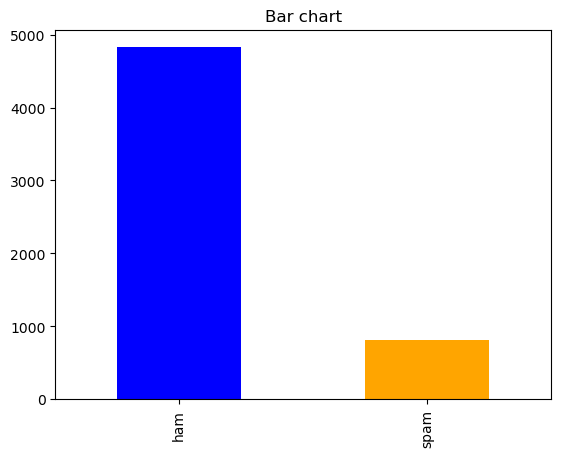

In [3]:
count_Class = pd.value_counts(df['Category'], sort = True)
count_Class.plot(kind = 'bar', color = ["blue", "orange"])
plt.title('Bar chart')
plt.show()

In [20]:
lstem = LancasterStemmer()
def mes(message):
    message_x = []
    for me_x in message:
        me_x = ''.join(filter(lambda mes:(mes.isalpha() or mes == " "), me_x))
        words = word_tokenize(me_x)
        message_x += [' '.join([lstem.stem(word) for word in words])]
    return message_x

In [21]:
message_x = mes(message_X)

tfvec = TfidfVectorizer(stop_words='english')


x_new = tfvec.fit_transform(message_x).toarray()

In [22]:
y_new = np.array(labels_Y.replace(to_replace = ['ham', 'spam'], value =[0, 1]))

In [23]:
x_train, x_test, y_train, y_test = ttsplit(x_new, y_new, test_size = 0.2, random_state = 1)

In [24]:
classifier = svm.SVC(kernel = 'linear')
#classifier = LogisticRegression()
#classifier = MultinomialNB()
#scores = cross_val_score(classifier, x_train, y_train, cv = 5)
#print("Cross-validation accurary: ", scores.mean(), "+/-", scores.std())
classifier.fit(x_train, y_train)

SVC(kernel='linear')

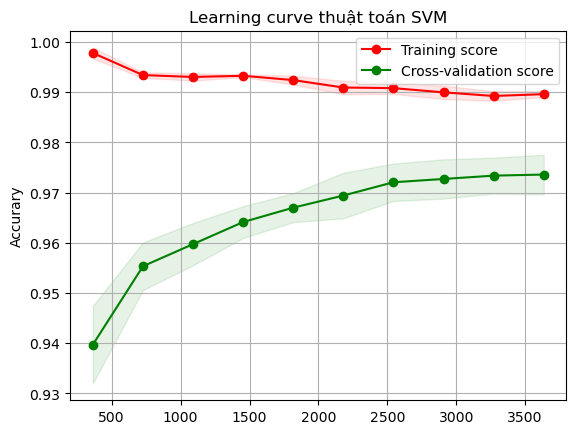

In [25]:
train_sizes = np.linspace(0.1, 1.0, 10)

train_sizes, train_scores, val_scores = learning_curve(classifier, x_train, y_train, train_sizes=train_sizes, cv=5)

train_scores_mean = np.mean(train_scores, axis = 1)
train_scores_std = np.std(train_scores, axis = 1)
val_scores_mean = np.mean(val_scores, axis = 1)
val_scores_std = np.std(val_scores, axis = 1)

plt.figure()
plt.title('Learning curve thuật toán SVM')
plt.ylabel("Accurary")
plt.grid()
plt.fill_between(train_sizes,train_scores_mean - train_scores_std, 
                 train_scores_mean + train_scores_std, alpha = 0.1, color ="r")
plt.fill_between(train_sizes, val_scores_mean-val_scores_std,
                 val_scores_mean+val_scores_std, alpha = 0.1, color = "g")
plt.plot(train_sizes, train_scores_mean, 'o-', color = "r", label = "Training score")
plt.plot(train_sizes, val_scores_mean, 'o-', color = "g", label = "Cross-validation score")
plt.legend(loc = "best")
plt.show()

In [27]:
Accurary = accuracy_score(y_test, classifier.predict(x_test))
Precision = precision_score(y_test, classifier.predict(x_test))
Recall = recall_score(y_test, classifier.predict(x_test))
F1_Score = f1_score(y_test, classifier.predict(x_test))

print('Accurary: {:.2f}%'.format(Accurary*100))
print('Precision: {:.2f}%'.format(Precision*100))
print('Recall: {:.2f}%'.format(Recall*100))
print('F1_Score: {:.2f}%'.format(F1_Score*100))

Accurary: 97.10%
Precision: 93.92%
Recall: 85.28%
F1_Score: 89.39%


In [28]:
m_confusion_test = metrics.confusion_matrix(y_test, classifier.predict(x_test))
pd.DataFrame(data = m_confusion_test, columns= ['Dự đoán (Ham)}' , 'Dự đoán (Spam)'],
             index = ['Thực tế (Ham)', 'Thực tế (Spam)'] )

,Dự đoán (Ham)},Dự đoán (Spam)
Thực tế (Ham),965,9
Thực tế (Spam),24,139


Confusion Matrix id: 
 [[965   9]
 [ 24 139]]


<Axes: >

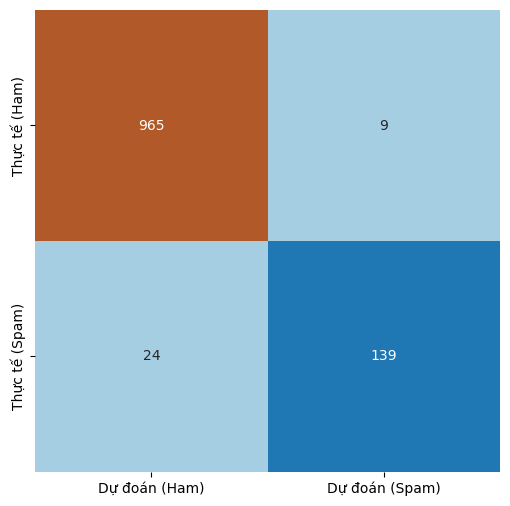

In [29]:
import seaborn as sns
cmat = confusion_matrix(y_test, classifier.predict(x_test))

print('Confusion Matrix id: \n', cmat)
plt.figure(figsize= (6, 6))
sns.heatmap(cmat, annot = True, cmap = 'Paired', cbar = False, fmt = "d", 
            xticklabels= ['Dự đoán (Ham)', 'Dự đoán (Spam)'],
            yticklabels=['Thực tế (Ham)', 'Thực tế (Spam)'])

In [30]:
test = [1]

inputMail = ["Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"]

dt = mes(inputMail)

tfvec = TfidfVectorizer(stop_words='english')


dt_new = tfvec.fit_transform(dt).toarray()

print(dt_new)
print(dt_new.shape)




[[0.20851441 0.20851441 0.20851441 0.41702883 0.41702883 0.20851441
  0.20851441 0.20851441 0.20851441 0.20851441 0.20851441 0.20851441
  0.20851441 0.20851441 0.20851441 0.20851441 0.20851441]]
(1, 17)
